In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Джойчик\\Desktop\\travel_bookings2024.csv', encoding='windows-1251', sep=',')

In [3]:
df.head(50)

,booking_id,user_id,region_destination,date,bookings,total_amount,region_origin,booking_type,checkin_date,source_channel,user_segment,cancellation_status,checkout_date
0,1001,U0762,Tokyo,2024-12-05,7,193622.218824,Kazan,hotel,2024-12-07,app,premium,0,2024-12-11
1,1002,U0190,New York,2024-04-03,4,133276.059099,Paris,flight,2024-04-27,website,business,0,2024-04-30
2,1003,U0711,Bangkok,2024-07-26,3,81472.709403,Kazan,flight,2024-08-05,app,premium,0,2024-08-06
3,1004,U1508,New York,2024-12-22,3,229810.260086,Moscow,hotel,2025-01-16,partner,premium,0,2025-01-20
4,1005,U1757,New York,2024-08-23,7,259046.534108,St Petersburg,flight,2024-09-21,website,premium,0,2024-09-27
5,1006,U1560,Paris,2024-11-23,4,111282.928043,Kazan,hotel,2024-12-21,website,premium,0,2024-12-26
6,1007,U0756,Bangkok,2024-08-29,5,67765.352556,London,flight,2024-09-04,NaN,business,0,2024-09-05
7,1008,U1447,Bangkok,2024-12-01,5,85445.342858,Moscow,flight,2024-12-29,website,premium,0,2025-01-12
8,1009,U0836,Bangkok,2024-12-21,3,69142.011945,Moscow,flight,2024-12-29,app,premium,0,2025-01-08
9,1010,U1664,New York,2024-05-03,5,229155.860770,Paris,hotel,2024-05-15,partner,economy,0,2024-05-22


# Предобработка данных

In [ ]:

df["date"] = pd.to_datetime(df["date"]) 
df["checkin_date"] = pd.to_datetime(df["checkin_date"]) 
df["checkout_date"] = pd.to_datetime(df["checkout_date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   booking_id           10000 non-null  int64         
 1   user_id              10000 non-null  object        
 2   region_destination   10000 non-null  object        
 3   date                 10000 non-null  datetime64[ns]
 4   bookings             10000 non-null  int64         
 5   total_amount         10000 non-null  float64       
 6   region_origin        10000 non-null  object        
 7   booking_type         10000 non-null  object        
 8   checkin_date         10000 non-null  datetime64[ns]
 9   source_channel       9704 non-null   object        
 10  user_segment         10000 non-null  object        
 11  cancellation_status  10000 non-null  int64         
 12  checkout_date        10000 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1)

In [ ]:
df.isnull().sum()

booking_id               0
user_id                  0
region_destination       0
date                     0
bookings                 0
total_amount             0
region_origin            0
booking_type             0
checkin_date             0
source_channel         296
user_segment             0
cancellation_status      0
checkout_date            0
dtype: int64

In [7]:
df_active = df[df["cancellation_status"] == 0]
print("Активных бронирований:", len(df_active))

Активных бронирований: 8958


# Анализ и визуализация

In [8]:
#Группировка по месяцам
monthly_bookings = df_active.groupby(df_active["date"].dt.strftime('%b'))["bookings"].sum() 

In [9]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
monthly_bookings = monthly_bookings.reindex(month_order)

In [10]:
print(monthly_bookings)

date
Jan    2525
Feb    1436
Mar    2513
Apr    3677
May    3170
Jun    4304
Jul    3773
Aug    4372
Sep    1831
Oct    1937
Nov    3019
Dec    6552
Name: bookings, dtype: int64


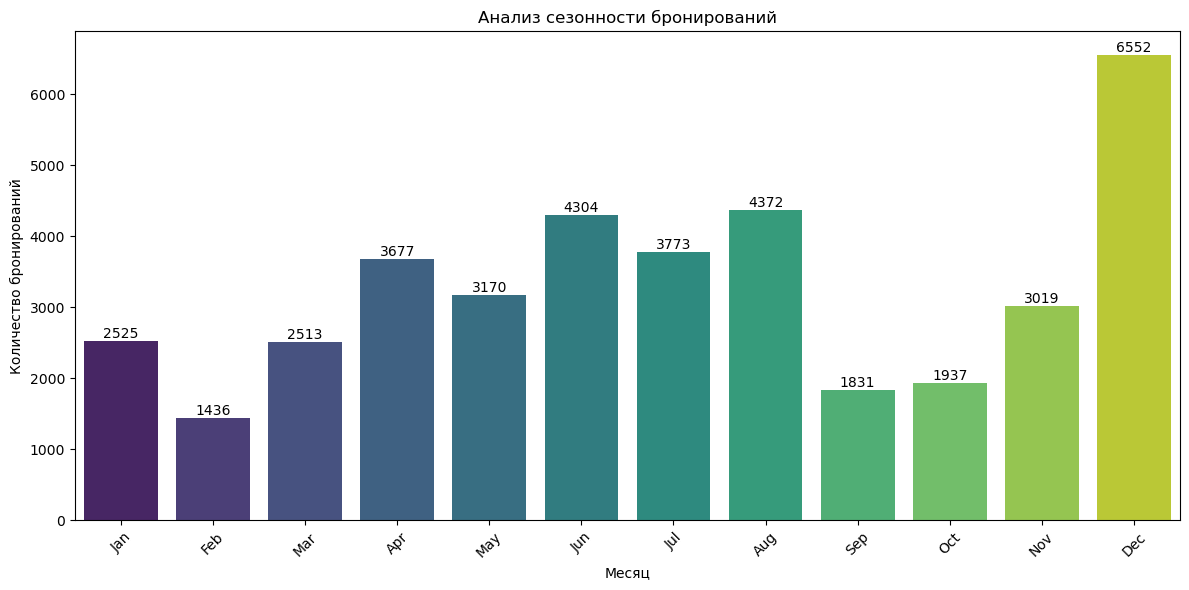

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette="viridis")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom")
plt.title("Анализ сезонности бронирований")
plt.xlabel("Месяц")
plt.ylabel("Количество бронирований")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Выводы по анализу сезонности бронирований по месяцам (2024)

- **Декабрь (6,552):**  
  - **Наблюдение:** Пик спроса — новогодние праздники.  
  - **Рекомендация:** Повышение цен оправдано.

- **Июнь-август (4,304, 3,773, 4,372):**  
  - **Наблюдение:** Летний высокий сезон.  
  - **Рекомендация:** Увеличить тарифы и усилить рекламу.

- **Апрель (3,677):**  
  - **Наблюдение:** Весенний всплеск, особенно для Токио.  
  - **Рекомендация:** Подходит для роста цен.

- **Февраль (1,436) и сентябрь (1,831):**  
  - **Наблюдение:** Низкий спрос.  
  - **Рекомендация:** Время для акций и скидок.

In [12]:
#Группировка по дням
weekly_bookings = df_active.groupby(df_active["date"].dt.strftime('%a'))["bookings"].sum()

In [13]:
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
weekly_bookings = weekly_bookings.reindex(day_order)

In [14]:
print(weekly_bookings)

date
Mon    4744
Tue    6113
Wed    5989
Thu    5306
Fri    6637
Sat    4849
Sun    5471
Name: bookings, dtype: int64


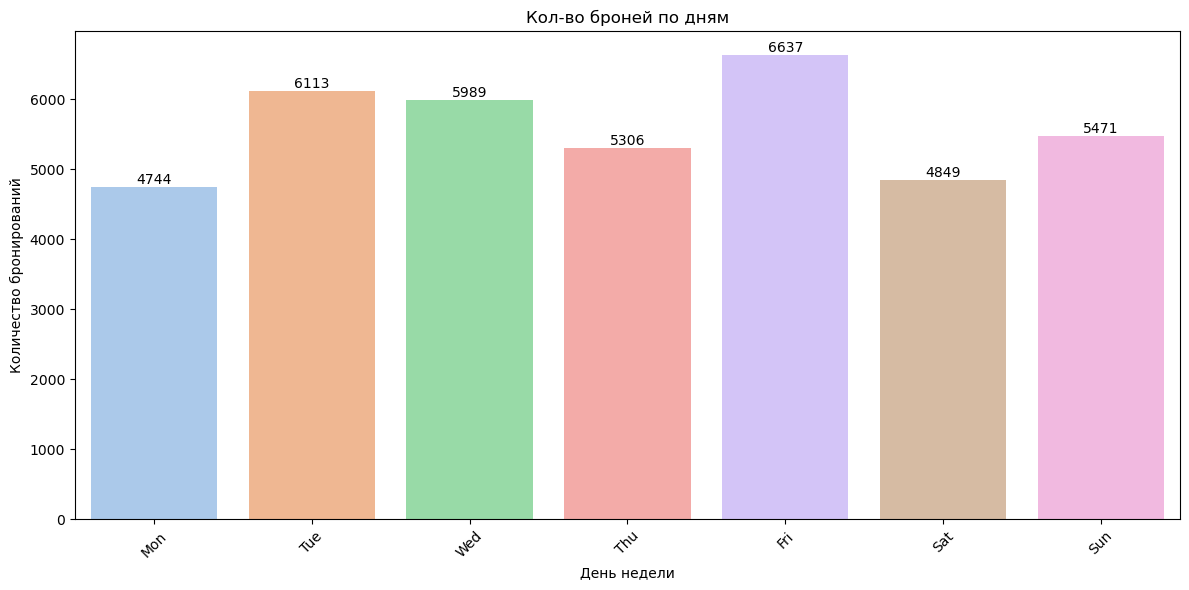

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=weekly_bookings.index, y=weekly_bookings.values, palette="pastel")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom")
plt.title("Кол-во броней по дням")
plt.xlabel("День недели")
plt.ylabel("Количество бронирований")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Выводы по анализу спроса на бронирования по дням недели (2024)

- **Пятница (6,637):**  
  - **Наблюдение:** Наибольший спрос.  
  - **Рекомендация:** Увеличить цены и усилить рекламу.

- **Вторник (6,113) и среда (5,989):**  
  - **Наблюдение:** Высокий спрос в середине недели.  
  - **Рекомендация:** Предлагать специальные акции для раннего бронирования.

- **Четверг (5,306) и воскресенье (5,471):**  
  - **Наблюдение:** Умеренный спрос.  
  - **Рекомендация:** Поддерживать стандартные тарифы.

- **Понедельник (4,744) и суббота (4,849):**  
  - **Наблюдение:** Наименьший спрос.  
  - **Рекомендация:** Внедрить скидки и акции для стимулирования спроса.

In [16]:
#Группировка по месяцам и городам
monthly_by_region = df_active.groupby([df_active["date"].dt.strftime('%b'), "region_destination"])["bookings"].sum().unstack()

In [17]:
#Упорядочиваем месяцы
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
monthly_by_region = monthly_by_region.reindex(month_order)


In [18]:
print(monthly_by_region)

region_destination  Bangkok  London  New York  Paris  Tokyo
date                                                       
Jan                     453     544       539    521    468
Feb                     275     263       312    285    301
Mar                     484     568       474    436    551
Apr                     719     779       688    804    687
May                     627     677       583    575    708
Jun                     818     767       981   1004    734
Jul                     752     751       840    785    645
Aug                     842     854       813    968    895
Sep                     354     450       373    325    329
Oct                     370     428       366    411    362
Nov                     556     516       653    570    724
Dec                    1257    1342      1409   1246   1298


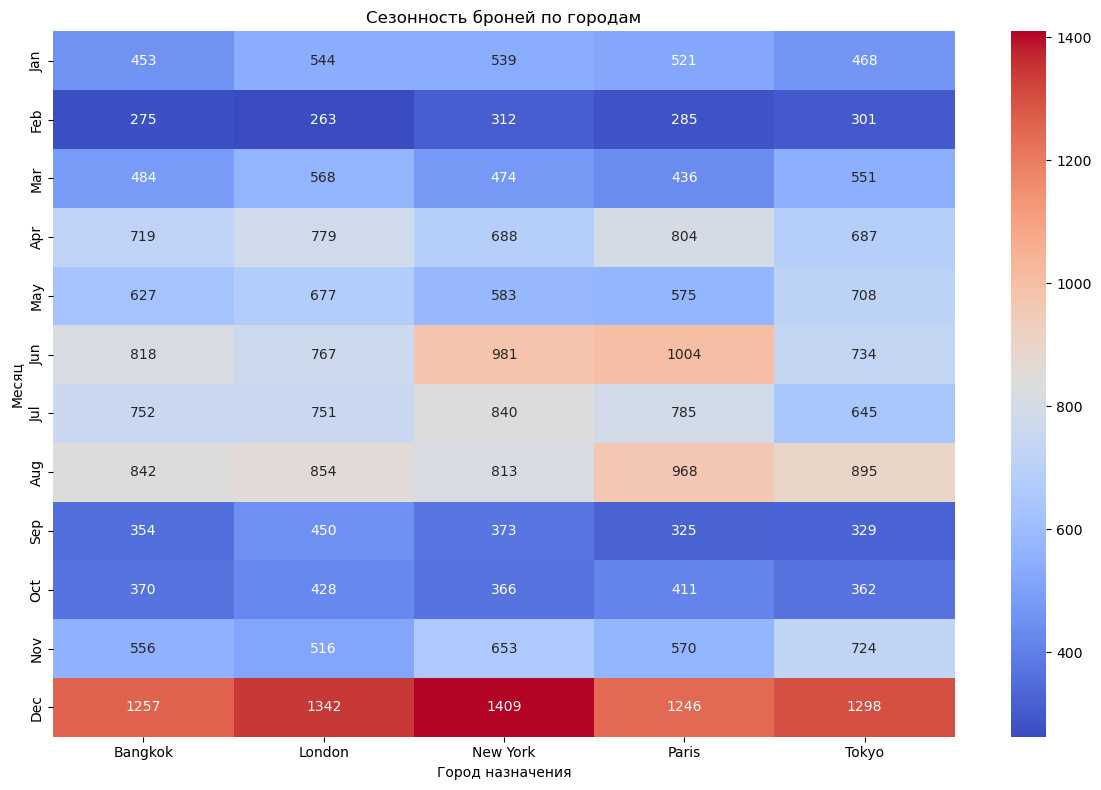

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_by_region, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Сезонность броней по городам")
plt.xlabel("Город назначения")
plt.ylabel("Месяц")
plt.tight_layout()
plt.show()

### Выводы по анализу сезонности бронирований по городам назначения (2024)

- **Декабрь:**  
  - **New York (1,409), London (1,342):**  
    - **Наблюдение:** Пик спроса на все направления — праздничный сезон.  
    - **Рекомендация:** Повышать цены.

- **Июнь-август:**  
  - **Paris (1,004), New York (981):**  
    - **Наблюдение:** Летний бум, особенно для Парижа и Нью-Йорка.  
    - **Рекомендация:** Усилить тарифы.

- **Апрель:**  
  - **Bangkok (719), Paris (804):**  
    - **Наблюдение:** Весенний всплеск — время роста цен на азиатские и европейские туры.  
    - **Рекомендация:** Увеличить цены.

- **Февраль:**  
  - **London (263), Bangkok (275):**  
    - **Наблюдение:** Низкий сезон для всех направлений.  
    - **Рекомендация:** Предлагать скидки и акции.

In [20]:
#Группировка по месяцам и типам брони
monthly_by_type = df_active.groupby([df_active["date"].dt.strftime('%b'),"booking_type"])["bookings"].sum().unstack()

In [21]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
monthly_by_type = monthly_by_type.reindex(month_order)

In [22]:
print(monthly_by_type)

booking_type  flight  hotel
date                       
Jan             1327   1198
Feb              719    717
Mar             1184   1329
Apr             1878   1799
May             1577   1593
Jun             2137   2167
Jul             1827   1946
Aug             2106   2266
Sep              892    939
Oct             1000    937
Nov             1524   1495
Dec             3368   3184


<Figure size 1200x600 with 0 Axes>

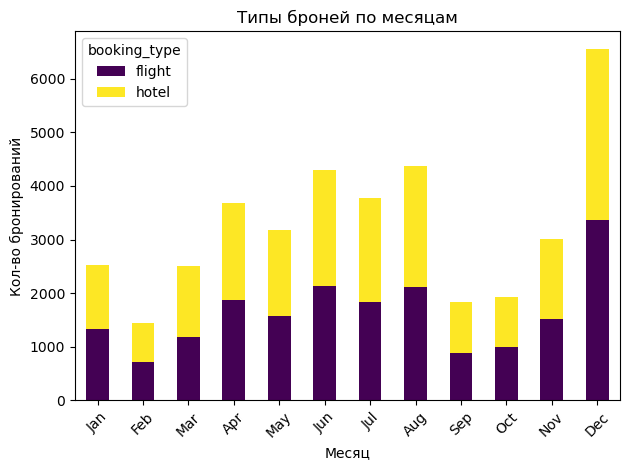

In [23]:
plt.figure(figsize=(12, 6))
monthly_by_type.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Типы броней по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Кол-во бронирований")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Выводы по анализу сезонности бронирований по типам (самолёты,отели)

- **Декабрь:**  
  - **Рейсы (3,368), отели (3,184):**  
    - **Наблюдение:** Пик спроса, рейсы лидируют.  
    - **Рекомендация:** Повышать цены на оба типа.

- **Август:**  
  - **Отели (2,266), рейсы (2,106):**  
    - **Наблюдение:** Летний топ, отели впереди.  
    - **Рекомендация:** Рост тарифов на проживание.

- **Февраль:**  
  - **Рейсы (719), отели (717):**  
    - **Наблюдение:** Низкий сезон.  
    - **Рекомендация:** Акции для стимуляции спроса.

- **Общий тренд:**  
  - **Наблюдение:** Рейсы и отели почти равны, с лёгким перевесом отелей летом.  
  - **Рекомендация:** Учитывать сезонные колебания при планировании акций и тарифов.